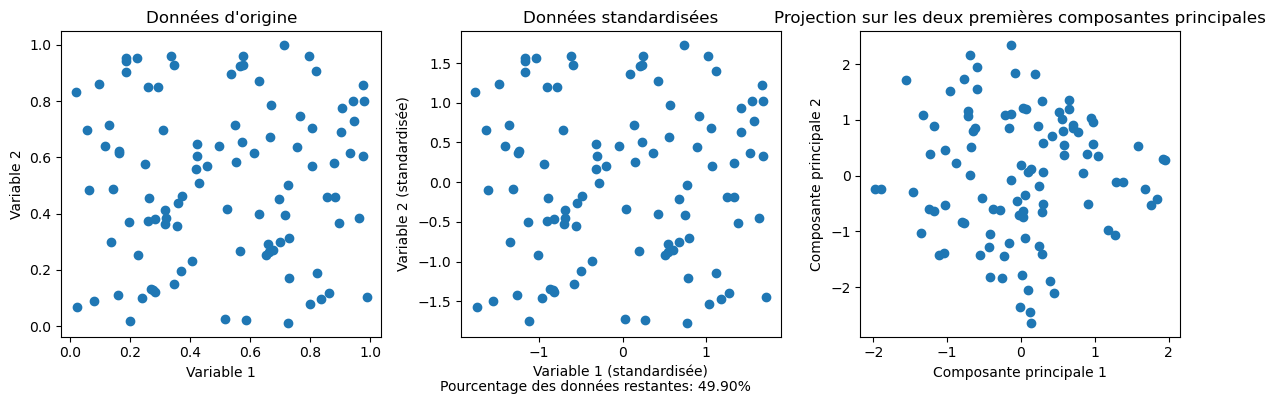

In [1]:
# Importer les bibliothèques nécessaires
import numpy as np
import matplotlib.pyplot as plt

# Génération de données aléatoires
np.random.seed(0)
X = np.random.rand(100, 4)  # 100 échantillons avec 4 variables

# Étape 1 : Standardisation des données
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
X_std = (X - mean) / std

# Étape 2 : Calcul de la matrice de covariance
cov_matrix = np.cov(X_std, rowvar=False)

# Étape 3 : Calcul des vecteurs et valeurs propres
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Étape 4 : Sélection des composantes principales
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
n_components = 2  # Nombre de composantes principales à sélectionner
components = eigenvectors[:, :n_components]

# Étape 5 : Projection des données sur les composantes principales
X_pca = np.dot(X_std, components)

# Calcul du pourcentage des données restantes après la PCA
percentage_retained = np.sum(explained_variance_ratio[:n_components]) * 100

# Visualisation en 2D des étapes de la PCA
plt.figure(figsize=(12, 4))

# Données d'origine
plt.subplot(131)
plt.scatter(X[:, 0], X[:, 1])
plt.title("Données d'origine")
plt.xlabel("Variable 1")
plt.ylabel("Variable 2")

# Données standardisées
plt.subplot(132)
plt.scatter(X_std[:, 0], X_std[:, 1])
plt.title("Données standardisées")
plt.xlabel("Variable 1 (standardisée)")
plt.ylabel("Variable 2 (standardisée)")

# Projection sur les deux premières composantes principales
plt.subplot(133)
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.title("Projection sur les deux premières composantes principales")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")

# Ajout du pourcentage des données restantes
plt.figtext(0.5, 0.01, f"Pourcentage des données restantes: {percentage_retained:.2f}%", ha="center")

plt.tight_layout()
plt.show()
